<H1>Discrete Fourier Transformation</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H2>Example of ideal signal</H2>

In [2]:
# create artificial wave signal
sf = 1000 # samples per second (sec^{-1})
dt = 1/sf # sampling interval (in sec)
t = np.arange(0,2, dt) # 5 seconds activity

# create a signal
wave = lambda f: np.sin(2*np.pi*f*t) 
signal = 2.5 * wave(4) + 1.5 * wave(6.5)# + 0.5*wave(2.4)

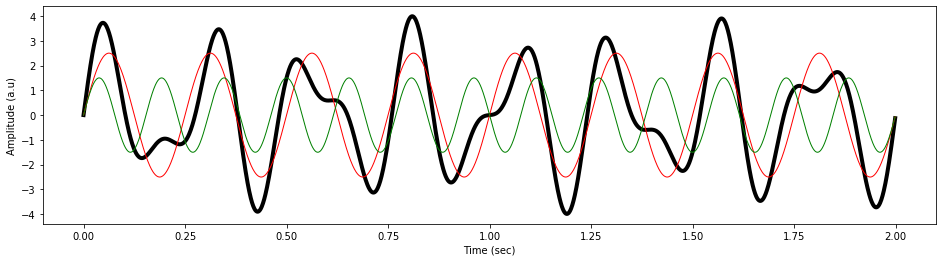

In [3]:
# plot signal and the sum of the waves
plt.figure(figsize=(16,4))
plt.plot(t,signal, lw = 4, color = 'black')
plt.plot(t, 2.5*wave(4), color='red', lw=1)
plt.plot(t, 1.5*wave(6.5), color = 'green', lw = 1)
#plt.plot(t, 0.5*wave(2.4), color= 'blue', lw = 1)
plt.xlabel("Time (sec)");plt.ylabel('Amplitude (a.u)');

<H2>Discrete Fourier transformation</H2>

In [4]:
# fourTime is the normalized time vector: we need a complex wave which is having the same
# number of points as the signal we want to analyze. It's important to keep the phase!

# you want the wave to start at zero.
FourierTime = np.arange(signal.size)/signal.size

In [5]:
# create a complex wave with the Eulers formula e^ik that depends only on the frequency
csw = lambda freq: np.exp( -1j*2*np.pi*freq*FourierTime )

In [10]:
# dot product of complex waves and signal for waves with frequencies betwen 0 and number of samples
# of the signal. It will return the Fourier coefficients (amplitude and phase) for every frequency.
FourierCoeff = list()
for f in range(len(t)):
    FourierCoeff.append( np.dot(signal, csw(f))/ signal.size ) # normalize the dot product

In [11]:
# now compute amplitudes
amp = 2*np.abs(FourierCoeff)

In [12]:
# and compute phases (in rad)
phi = np.angle(FourierCoeff)

In [13]:
# compute frequencies vector, it goes from zero (DC component) to half the sampling frequency (Nyquist)
# n/2 + 1 for the offset
Nyquist = sf/2
print('Nyquist frequency is {:2.2f} Hz'.format(Nyquist))

# To transform into Hz. If we have sf in samples/seconds, the units are Hz (e.g., sf = 30000 = 30 kHz)
# we need to know that we can only sample half of the sampling frequency (e.g., 15 kHz) but we need to express it
# in units of sampling points (e.g., 15000).


# n/2 + 1 is to take only the possitive frequencies (?)
hz = np.linspace(0, sf/2., num = int(np.floor(len(t)/2.))+1 )

Nyquist frequency is 500.00 Hz


1001

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


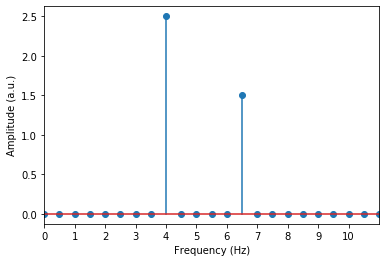

In [14]:
# plot frequencies vs amp
plt.stem(hz, amp[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,11);

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


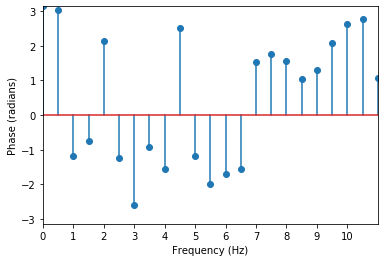

In [15]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,11);

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


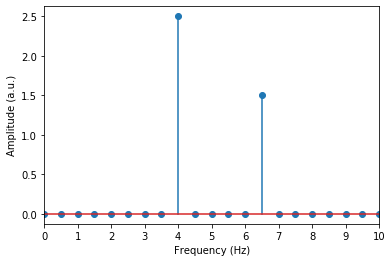

In [16]:
# with python fft
FourierCoeff = np.fft.fft(signal)/signal.size
ampl = 2*np.abs(FourierCoeff)  
phi = np.angle(FourierCoeff)

# compute frequencies vector until half the sampling rate
hz = np.linspace(0, sf/2., num = math.floor(signal.size/2) + 1 )

plt.stem(hz,ampl[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,10);

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


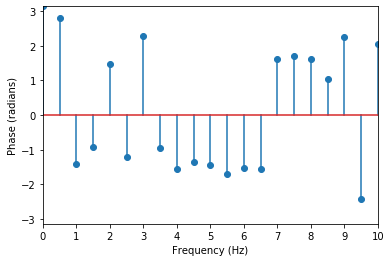

In [17]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,10);

<H2>A real example</H2>

Nyquist frequency is 3.00/hour


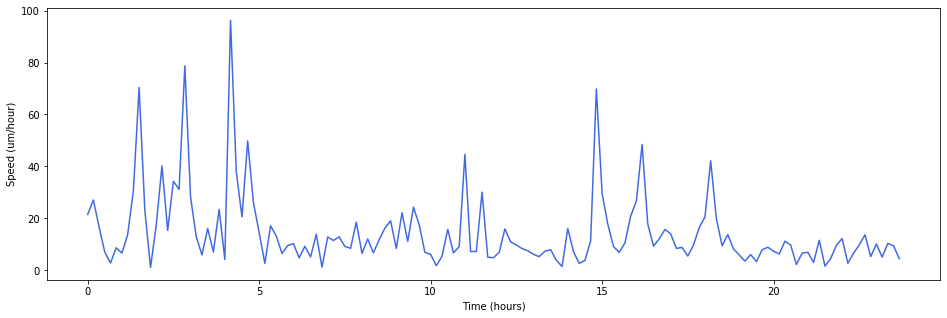

In [41]:
speed = np.loadtxt('speed.txt')

sf = 6 # samples per hour
dt = 1/sf # write sampling points in hours -1 (i.e., 6 per hour )

Nyquist = sf/2
print('Nyquist frequency is {:2.2f}/hour'.format(Nyquist))
# Nyquist frequency is 3 per hour, which is the fastest frequency we can get.
# We can have something one every 7 hours (1/7 = 0.14 ) which is slower, it can be resolved
t = np.arange(0, speed.size*dt, dt)

fig = figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.plot(t, speed, color='royalblue', lw  = 1.5);
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');
#ax.set_xticks(range(0, 25, 6));

In [31]:
# fourTime is the normalized time
normt = np.arange(speed.size)/speed.size

# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*normt )

In [32]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(speed.size):
    FourierCoeff.append( np.dot(speed, csw(f))/speed.size)

In [35]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

In [36]:
phi = np.angle(FourierCoeff)

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


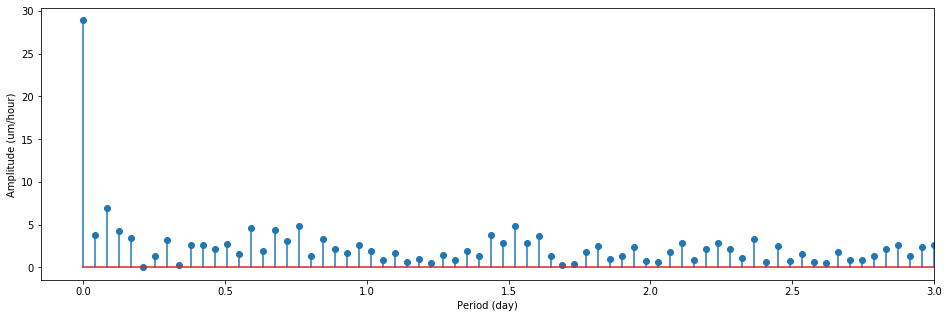

In [42]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num = math.floor(speed.size/2) + 1 )
fig = figure(figsize=(16,5))
plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Period (day)'), plt.ylabel('Amplitude (um/hour)')
plt.xlim(xmax=3);

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


(0, 3)

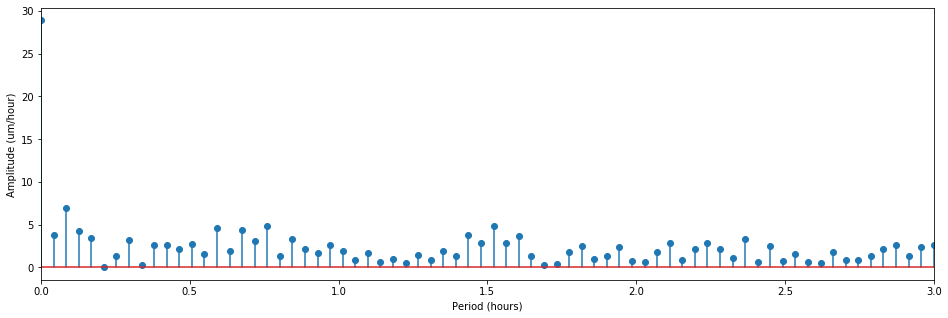

In [43]:
FourierCoeff = np.fft.fft(speed)/len(speed)
ampl = 2*np.abs(FourierCoeff)

# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )
fig = figure(figsize=(16,5))
plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Amplitude (um/hour)')
#plt.xticks(range(12))
plt.xlim(0,3)


/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


(-3.141592653589793, 3.141592653589793)

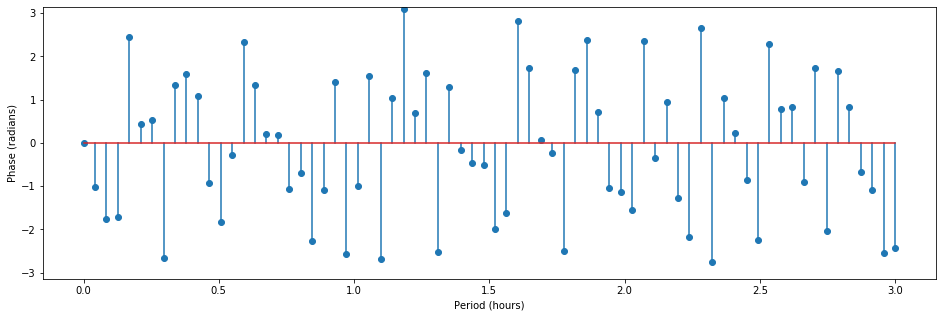

In [44]:
# compute phase vector
phi = np.angle(FourierCoeff)
fig = figure(figsize=(16,5))
plt.stem(hz,phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)


In [64]:
np.rad2deg(phi[:len(hz)][7])

-152.43843389998165

In [49]:
np.mean(speed)*2

28.87367630769231

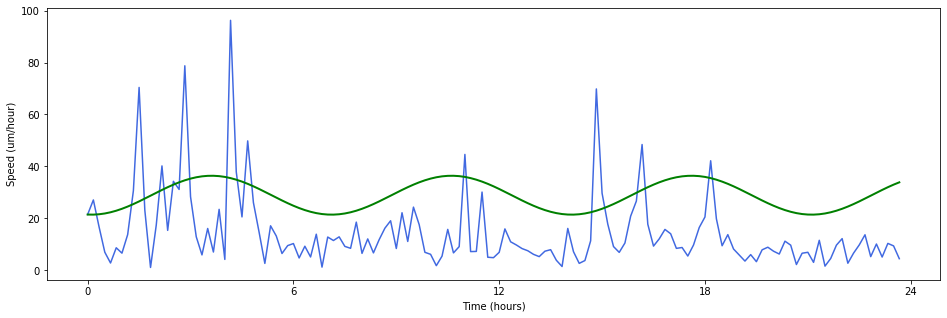

In [55]:
offset = np.mean(speed)*2
mywave2 = offset + 7.5*np.sin(2*np.pi*(1/7)*t + np.rad2deg(phi[:len(hz)][1])) # add 5 offset because speed is alwasy positive

fig = figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.plot(t, speed, color='royalblue', lw  = 1.5);

ax.plot(t, mywave2, color='green', lw=2)

ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');
ax.set_xticks(range(0, 25, 6));

<H2>Compute with the DC component</H2>